In [1]:
!pip install pycaret==3.0.4
!pip install pycaret[analysis]==3.0.4
!pip install shap==0.40.0
!pip install numpy==1.23.5

  Using cached shap-0.45.0-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (538 kB)
  Attempting uninstall: shap
    Found existing installation: shap 0.40.0
    Uninstalling shap-0.40.0:
      Successfully uninstalled shap-0.40.0
  Using cached shap-0.40.0-cp310-cp310-linux_x86_64.whl
  Attempting uninstall: shap
    Found existing installation: shap 0.45.0
    Uninstalling shap-0.45.0:
      Successfully uninstalled shap-0.45.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
explainerdashboard 0.4.5 requires shap>=0.42.1, but you have shap 0.40.0 which is incompatible.


In [2]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
from pycaret.regression import *
reg1 = setup(data, target = 'charges', session_id=1)

,Description,Value
0,Session id,1
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


In [4]:
best_model = compare_models(fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2671.0316,22802070.3444,4754.9133,0.8430,0.4614,0.3313,0.3720
lightgbm,Light Gradient Boosting Machine,2988.7787,24864294.8687,4967.4365,0.8293,0.5511,0.3779,0.5460
rf,Random Forest Regressor,2811.4850,25145455.9262,5005.3493,0.8277,0.4863,0.3442,0.8260
et,Extra Trees Regressor,2807.5656,27657139.9361,5243.4199,0.8105,0.4980,0.3370,0.6020
ada,AdaBoost Regressor,4236.3433,28698756.2206,5349.6735,0.8024,0.6369,0.7334,0.1960
xgboost,Extreme Gradient Boosting,3211.5779,29685825.6000,5435.3252,0.7957,0.5743,0.4160,0.6400
br,Bayesian Ridge,4221.0785,37430268.0274,6110.1304,0.7451,0.5802,0.4322,0.1700
ridge,Ridge Regression,4228.8245,37431332.8470,6110.1951,0.7451,0.5777,0.4335,0.3580
lar,Least Angle Regression,4212.7467,37428161.4425,6109.9838,0.7450,0.5844,0.4308,0.4400
llar,Lasso Least Angle Regression,4213.0970,37428023.0516,6109.9811,0.7450,0.5831,0.4309,0.1720


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [5]:
lgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3658.0607,42817541.4594,6543.5114,0.7343,0.8272,0.3316
1,3149.9044,24677350.7871,4967.6303,0.8096,0.6872,0.4568
2,2103.4995,12986349.8080,3603.6578,0.9134,0.4404,0.3756
3,3203.9936,22865360.4962,4781.7738,0.8325,0.5064,0.3991
4,3245.7093,28574381.5072,5345.5011,0.7999,0.5412,0.3622
5,2799.5245,19181370.3695,4379.6541,0.8514,0.4434,0.3238
6,3017.7155,24535271.8343,4953.3092,0.8160,0.5891,0.3732
7,3302.8236,32669789.7628,5715.7493,0.7581,0.5073,0.3925
8,2790.8908,24454782.4357,4945.1777,0.8694,0.5189,0.3151


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [6]:
tuned_lgbm = tune_model(lgbm, n_iter=5, optimize = 'RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3837.4940,40165464.9217,6337.6230,0.7507,0.5486,0.4123
1,2874.7081,20864712.2589,4567.7907,0.8390,0.5086,0.4042
2,2136.6788,12526594.0238,3539.2929,0.9165,0.3990,0.3759
3,2788.1336,20673979.6920,4546.8648,0.8486,0.4732,0.3891
4,2911.6540,26300556.4047,5128.4068,0.8158,0.4581,0.3252
5,2462.2218,17790226.5977,4217.8462,0.8622,0.4039,0.2908
6,2765.6913,20608981.1578,4539.7116,0.8454,0.4149,0.3275
7,3020.5501,28637881.9580,5351.4374,0.7879,0.4762,0.3667
8,2831.1943,24004617.8429,4899.4508,0.8718,0.5161,0.3821


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 5 candidates, totalling 50 fits


In [7]:
tuned_lgbm

LGBMRegressor(bagging_fraction=0.5, bagging_freq=7, feature_fraction=0.5,
              learning_rate=0.05, min_child_samples=1, min_split_gain=0.5,
              n_estimators=120, n_jobs=-1, num_leaves=4, random_state=1,
              reg_alpha=10, reg_lambda=0.05)

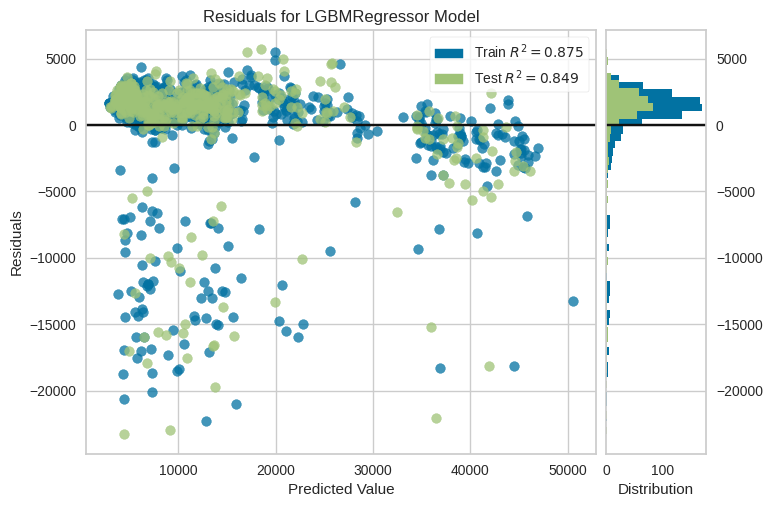

In [8]:
plot_model(tuned_lgbm)

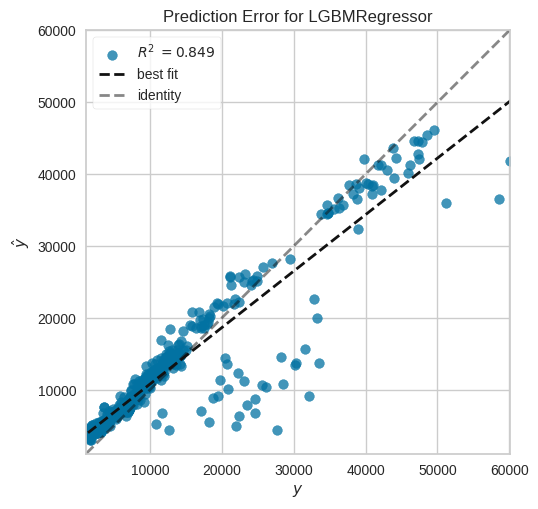

In [9]:
plot_model(tuned_lgbm, plot = 'error')

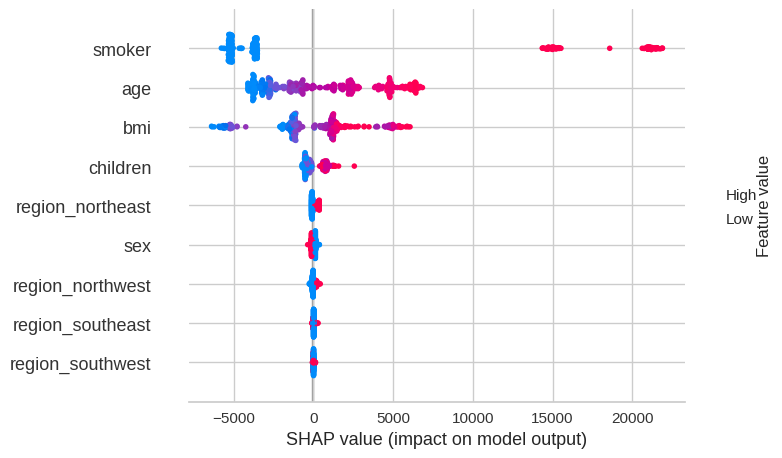

In [10]:
interpret_model(tuned_lgbm)

In [11]:
interpret_model(tuned_lgbm, plot = 'reason', observation = 1)#1番目の顧客のSHAP値